# Solving MDPs using Q-learning

## Introduction

- Given an MDP $\langle \mathcal{S}, \mathcal{A}, \mathcal{T}, \mathcal{R}, \gamma \rangle$, we would like to find an optimal policy $\pi^*$

- In the dynamic programming approaches like Value Iteration and Policy Iteration, we were able to *plan* our actions when we know the probabilities over the next states, given by $\mathcal{T}$ and rewards, given by $\mathcal{R}$.

<div align="center"> 
<img src="images/backup_diagram.png"  width="40%"/>
</div>

- Practical challenge: $\mathcal{T}, \mathcal{R}$ not explicitly available to us.

## Motivation

<div align="center"> 
<img src="images/RL_crow.gif"  width="40%"/>
</div>


Real environments can be very complex and you might not have an accurate model to describe it.

For example, training robots, develop self-driving cars and many more!

However, you can interact with the environment to learn how to act optimally in it.

## Machine Learning Overview

<div align="center"> 
<img src="images/ml_paradigms.png"  width="60%"/>
</div>

- 3 Pillars in ML
- RL: Decision-making under uncertainty -> MDP -> T and R not known

## How does it work?

- Reinforcement Learning (RL)  focuses on *learning* the optimal actions by interacting with the environment. 


- Reinforcement Learning (RL)  focuses on *learning* the optimal actions by interacting with the environment. 

<div align="center"> 
<img src="images/RL_illustration_0.png"  width="50%"/>
</div>

## How does it work?

- Reinforcement Learning (RL)  focuses on *learning* the optimal actions by interacting with the environment. 

<div align="center"> 
<img src="images/RL_illustration.png"  width="50%"/>
</div>

- The agent is in state $s \in \mathcal{S}$ and choses to take action $a \in \mathcal{A}$ in the environment. This action results in reward $r \in \mathcal{R}$ and sends the agent into a new state $s'\in \mathcal{S}$ and the cycle continues.

- $s_0, a_0, r_1, s_1, a_1, r_2, s_2, \ldots$

## RL Algorithms

<div align="center"> 
<img src="images/rl_algorithms.png"  width="70%"/>
</div>

## Q-Learning

- Learn $Q^*(s,a)$. But why?

Act greedily wrt $Q^*(s,a)$,

$$\pi^*(s) = \textrm{argmax}_{a} Q^*(s,a)$$

Recall once again, the Bellman optimality equations for optimal $Q$ values,

$$Q_{*}(s,a) = \sum_{s'} \mathcal{T}(s' | s, a) \big [\mathcal{R}(s,a,s') + \gamma \cdot \max_{a'} Q_{*}(s',a') \big ],$$


If you look closely, we are seeking an estimate of the $Q$ value for a state-action pair which is of the form,

$$\mathbb{E}[X] = \sum_{x} \mathbb{P}(x) \cdot x.$$

Give yourself a cookie if you recognised this equation from the previous tutorials on sampling

### Quick Detour

In the simplest Monte Carlo approach, we can estimate the mean as,

$$\mathbb{E}[X] \approx \mu_N(X) = \frac{1}{N} \sum_{i=1}^{N} x_i, \, x_i \sim X.$$

For example, say we are tracking the price $X$ of Apple's stock everyday, and in the first 5 days, we receive the following 5 values,

$$152, 155, 157, 160, 158.$$


What is the average value of the stock over the $5$ days?

$$\mu_5 = \frac{152 + 155 + 157 + 160 + 158}{5}.$$

On the next trading day, we get a new update say the price is $159$. Simplest way to update our estimate is,

$$\mu_6 = \frac{152 + 155 + 157 + 160 + 158 + 159}{6}.$$

More clever way to do this,

$$\mu_6 = \frac{(152 + 155 + 157 + 160 + 158) + 159}{6} = \frac{\mu_5 \cdot 5 + 159}{6}.$$

In general, 

$$\mu_n =  \frac{\mu_{n-1} \cdot (n-1) + x_n}{n},$$

which is called a *cumulative average*.

We rewrite this once again,

$$\mu_n =  \Big ( 1 - \frac{1}{n} \Big ) \mu_{n-1} + \Big ( \frac{1}{n} \Big ) x_n.$$

General idea,

$$\mu_n = (1 - \alpha) \cdot \text{old estimate} + \alpha \cdot \text{new estimate},$$

where, $\alpha = \frac{1}{n}$ for cumulative averaging.

Alternatively,

$$\mu_n = \text{old estimate} + \alpha \cdot (\text{new estimate} - \text{old estimate}),$$

### Back to Q-learning

When we take actions in world, we collect experiences in the following form, 

$$(s, a, r, s').$$

We then use these samples to improve our estimate of $Q$ values in the following way,

$$Q_{k+1}(s, a) = (1 - \alpha) \cdot \text{old estimate} + \alpha \cdot \text{new estimate}$$

where $\alpha \in (0, 1)$ is aptly called *learning rate* because it governs the rate at which we incorporate new information.

- If $\alpha = 1 \implies$ neglect old information

- If $\alpha = 0 \implies$ neglect new information

- We build the new estimate called *Temporal Difference Target* (TD target) using the Bellman equation,

$$\text{TD target} = r + \gamma \cdot V_{*}(s') $$  

- But we don't have $V_{*}(s')$, we estimate the future value of $s'$ using our current estimate $Q_k$ (*bootstrapping*), like we did in DP.

- Our TD target is therefore,

$$\text{TD target} = r + \gamma \cdot \max_{a'} Q_k(s', a').$$  

- The $Q$ value update therefore has the following form,

$$Q_{k+1}(s, a) = (1 - \alpha) \cdot \text{old estimate} + \alpha \cdot \text{TD target}.$$

- We now simply combine the previous equations together,

$$Q_{k+1}(s, a) = (1 - \alpha) \cdot Q_k(s, a) + \alpha \cdot \big [  r + \gamma \cdot \max_{a'} Q_k(s', a') \big ]$$

$$Q_{k+1}(s, a) = Q_k(s, a) - \alpha \cdot Q_k(s, a) + \alpha \cdot \big [  r + \gamma \cdot \max_{a'} Q_k(s', a') \big ]$$

$$Q_{k+1}(s, a) = Q_k(s, a) + \alpha \cdot \big [  r + \gamma \cdot \max_{a'} Q_k(s, a') -  Q_k(s, a) \big ]$$

Intuitively, we are nudging our current estimate in the direction of the difference between the current estimate and TD target.

## Exploration v/s Exploitation Trade-off

Optimal policy: $\pi^*(s) = \textrm{argmax}_{a} Q^*(s,a)$.

However, greedy policy: $\pi_k(s) = \textrm{argmax}_{a} Q_k(s,a)$.


Iteration 0:

<div align="center"> 
<img src="images/exploration.png"  width="30%"/>
</div>

Iteration 1:

<div align="center"> 
<img src="images/exploration_1.png"  width="30%"/>
</div>


Since we are learning from experiences, we need to occasionally visit new states by deviating from the greedy policy by taking random actions. 

Somewhat intuitively, you can think of this as follows,

Consider the choice between watching a new TV show v/s rewatching your favourite TV show. You know that you will definitely derive pleasure from watching your favourite TV show. However, the new show could potentially be better than your current favourite but trying it out also carries the risk of being disappointed. At the same time, you will never find a better one if you do not explore.

### Exploration Strategy: 𝜖-greedy policy

The simplest policy is called the $\epsilon$-greedy policy, where you take random actions with probability $\epsilon$.

Mathematically, the $\epsilon$-greedy policy is given as follows,

$$
\pi_{\epsilon}(s) = 
\begin{cases}
  \mathrm{argmax}_{a} Q_k(s, a), & \mathbb{P} = 1 - \epsilon, \\
  a \in \mathcal{A}, & \mathbb{P} = \epsilon.
\end{cases}
$$

## Demonstration

demonstration of various stages of Q learning, i.e. episode 0, episode 10, episode 50, episode 200

# Algorithm

Initialise Q values for all states-action pairs
Choose a learning rate in (0, 1] # hyperparameter
Choose exploration probability # hyperparameter
Choose number of episodes # hyperparameter

Loop for each episode:

    Get start state s0

    Loop until terminal state:

        # choose an action
        Choose actions according to the ε-greedy policy

        # step in the environment
        Take action (a) in the environment, observe reward (r) and move to next state (s')

        # Q-learning using (s,a,r,s')
        - get current value Q(s,a)
        - estimate future value: V*(s')
        - compute TD target: r + γ * V*(s')
        - Apply learning update to Q(s,a)

        Update current state to (s')

## Python Programming

In [1]:
import random
import numpy as np
from frozen_lake import FrozenLake

import matplotlib.pyplot as plt
from utils import plot_values, format_plot

In [2]:
env = FrozenLake(prob_slip=0)

## Initialisations

In [3]:
num_states = env.observation_space.n
num_actions = env.action_space.n
DISCOUNT_FACTOR = 0.9

# randomly initialise Q values for all states 
Q_values = np.random.rand(num_states, num_actions)
learning_rate = 0.9
epsilon = 0.6
NUM_EPISODES = 200

store_rewards = []

## Q-learning

In [4]:
# We train the agent for several episodes
for episode in range(NUM_EPISODES):

    done = False
    state = env.reset()
    total_reward = 0

    while not done:

        # ε-greedy policy to select actions
        # select random action with probability ε
        # |---------------ε----|
        # 0                    1
        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1, 2, 3])
        # select greedy action
        # simply act greedily wrt Q values
        else:
            # get Q values of all actions in current state
            q_values = Q_values[state, :]
            # if more than one action provides maximum, 
            # we break ties randomly
            optimal_actions = np.flatnonzero(q_values == max(q_values))
            action = np.random.choice(optimal_actions)

        # take a step in the environment
        next_state, reward, done = env.step(action)

        ## Q-Learning ##
  
        # get current Q values
        old_q = Q_values[state, action]

        # compute value of next_state
        # V(s') = max_a' Q(s', a')
        future_value = max(Q_values[next_state]) * int(1 - done)
        
        # compute TD target
        # TD_target = r + γ max_a' Q(s', a')
        TD_target = reward + DISCOUNT_FACTOR * future_value

        # update Q table
        # Q(s,a) = Q(s, a) + α (r + γ max_a' Q(s', a') - Q(s,a))
        Q_values[state, action] = Q_values[state, action] + learning_rate * (TD_target - old_q)

        # update the state
        state = next_state

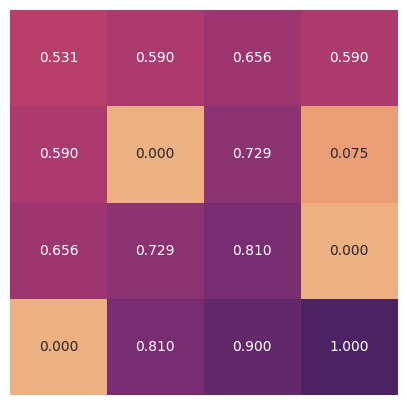

In [5]:
value_function = np.max(Q_values, axis=1)

fig, ax = plt.subplots(figsize=(5,5))

plot_values(ax, value_function)
format_plot(ax)

plt.show()

## Quiz

- What happens when the epsilon is set to 1? Why?

- What happens when the epsilon is set to 0? Why?

## Takeaways

- Reinforcement learning is an approach to solving MDPs when the underlying transition and reward models are not known.

- In order to learn the optimal action, the RL agent interacts with the environment. These interactions provide feedback based on which the agent takes future actions.

- Q Learning is value-based algorithm that updates the Q values of state-action values based on interaction with the environment.

- $Q_{k+1}(s, a) = Q_k(s, a) + \alpha \cdot \big [  r + \gamma \cdot \max_{a'} Q_k(s, a') -  Q_k(s', a) \big ]$

- The exploration/exploitation trade-off is important aspect in RL to ensure you sufficiently explore the policy space.

# References

Brockman, G.. OpenAI Gym. arXiv (2016). https://arxiv.org/pdf/1606.01540.pdf

Richard S. Sutton & Andrew G. Barto. Reinforcement learning : an introduction. (2020)